# EDA

In [1]:
# 0. basic
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1. EDA
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes(palette="muted")
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import *

In [2]:
from translate import *

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

#### column 별 정보

- item_id - 광고 ID
- user_id - 사용자 ID 
- region - 광고 지역
- city - 광고 도시
- parent_category_name - 최상위 수준 광고 카테고리
- category_name - 세부적인 광고 카테고리
- param_1 - 광고모델의 매개변수
- param_2 - 광고모델의 매개변수
- param_3 - 광고모델의 매개변수
- title - 광고 제목
- description - 광고 설명
- price - 광고 가격
- item_seq_number - 사용자의 광고 순차 번호
- activation_date- 게시된 날짜
- user_type - 사용자 유형
- image - 이미지 ID, train_jpg와 연관됨
- image_top_1 - 이미지 분류 코드
- deal_probability - 광고라 실제 제품을 팔 가능성 (y값)

In [4]:
# check shape
print('train shape :', train.shape) 
print('test shape :', test.shape) 

train shape : (1503424, 18)
test shape : (508438, 17)


In [5]:
# check information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null object
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: float64(3), int

In [6]:
# check null
train.isnull().any()

item_id                 False
user_id                 False
region                  False
city                    False
parent_category_name    False
category_name           False
param_1                  True
param_2                  True
param_3                  True
title                   False
description              True
price                    True
item_seq_number         False
activation_date         False
user_type               False
image                    True
image_top_1              True
deal_probability        False
dtype: bool

In [27]:
# Unique
print('train unique 갯수')
for i in range(18):
    print('{} : {}개'.format(train.columns[i], len(set(train[train.columns[i]]))))

train unique 갯수
item_id : 1503424개
user_id : 771769개
region : 28개
city : 1733개
parent_category_name : 9개
category_name : 47개
param_1 : 372개
param_2 : 272개
param_3 : 1220개
title : 788377개
description : 1317103개
price : 102368개
item_seq_number : 28232개
activation_date : 21개
user_type : 3개
image : 1390837개
image_top_1 : 115650개
deal_probability : 18407개


In [30]:
# region category 갯수 파악
train['region'].value_counts()

Краснодарский край         141416
Свердловская область        94475
Ростовская область          89995
Татарстан                   81284
Челябинская область         78339
Нижегородская область       73643
Самарская область           73407
Башкортостан                68291
Пермский край               62704
Новосибирская область       62486
Красноярский край           53442
Саратовская область         49645
Волгоградская область       48998
Кемеровская область         44635
Воронежская область         44116
Иркутская область           44030
Омская область              42939
Алтайский край              41520
Ставропольский край         39187
Тюменская область           35411
Ярославская область         32814
Калининградская область     32756
Оренбургская область        29303
Белгородская область        28868
Ханты-Мансийский АО         28709
Удмуртия                    28537
Владимирская область        26741
Тульская область            25733
Name: region, dtype: int64

In [31]:
# category_name 갯수 파악
train['category_name'].value_counts()

Одежда, обувь, аксессуары       282753
Детская одежда и обувь          270359
Товары для детей и игрушки       99747
Квартиры                         83670
Телефоны                         65944
Мебель и интерьер                65035
Предложение услуг                64385
Автомобили                       62494
Ремонт и строительство           56201
Бытовая техника                  33705
Товары для компьютера            29565
Дома, дачи, коттеджи             29244
Красота и здоровье               29198
Аудио и видео                    27036
Спорт и отдых                    24881
Коллекционирование               24346
Оборудование для бизнеса         16047
Земельные участки                16038
Часы и украшения                 15566
Книги и журналы                  11819
Собаки                           11612
Игры, приставки и программы      11167
Другие животные                  11040
Велосипеды                       10638
Ноутбуки                         10297
Кошки                    

In [35]:
# category_name 갯수 파악
train['parent_category_name'].value_counts()

Личные вещи            697623
Для дома и дачи        178823
Бытовая электроника    173008
Недвижимость           153190
Хобби и отдых           86011
Транспорт               79839
Услуги                  64385
Животные                52470
Для бизнеса             18075
Name: parent_category_name, dtype: int64

In [32]:
# activation_date 갯수 파악
train['activation_date'].value_counts()

2017-03-20    115190
2017-03-27    114863
2017-03-19    114416
2017-03-26    113513
2017-03-28    112885
2017-03-21    110535
2017-03-22    109813
2017-03-15    108615
2017-03-23    106544
2017-03-16    106168
2017-03-17     98773
2017-03-18     97554
2017-03-24     97351
2017-03-25     97104
2017-03-29        87
2017-04-01         3
2017-04-02         3
2017-03-30         3
2017-04-03         2
2017-03-31         1
2017-04-07         1
Name: activation_date, dtype: int64

In [33]:
# user_type 갯수 파악
train['user_type'].value_counts()

Private    1075706
Company     347249
Shop         80469
Name: user_type, dtype: int64

---

### 2. Y data

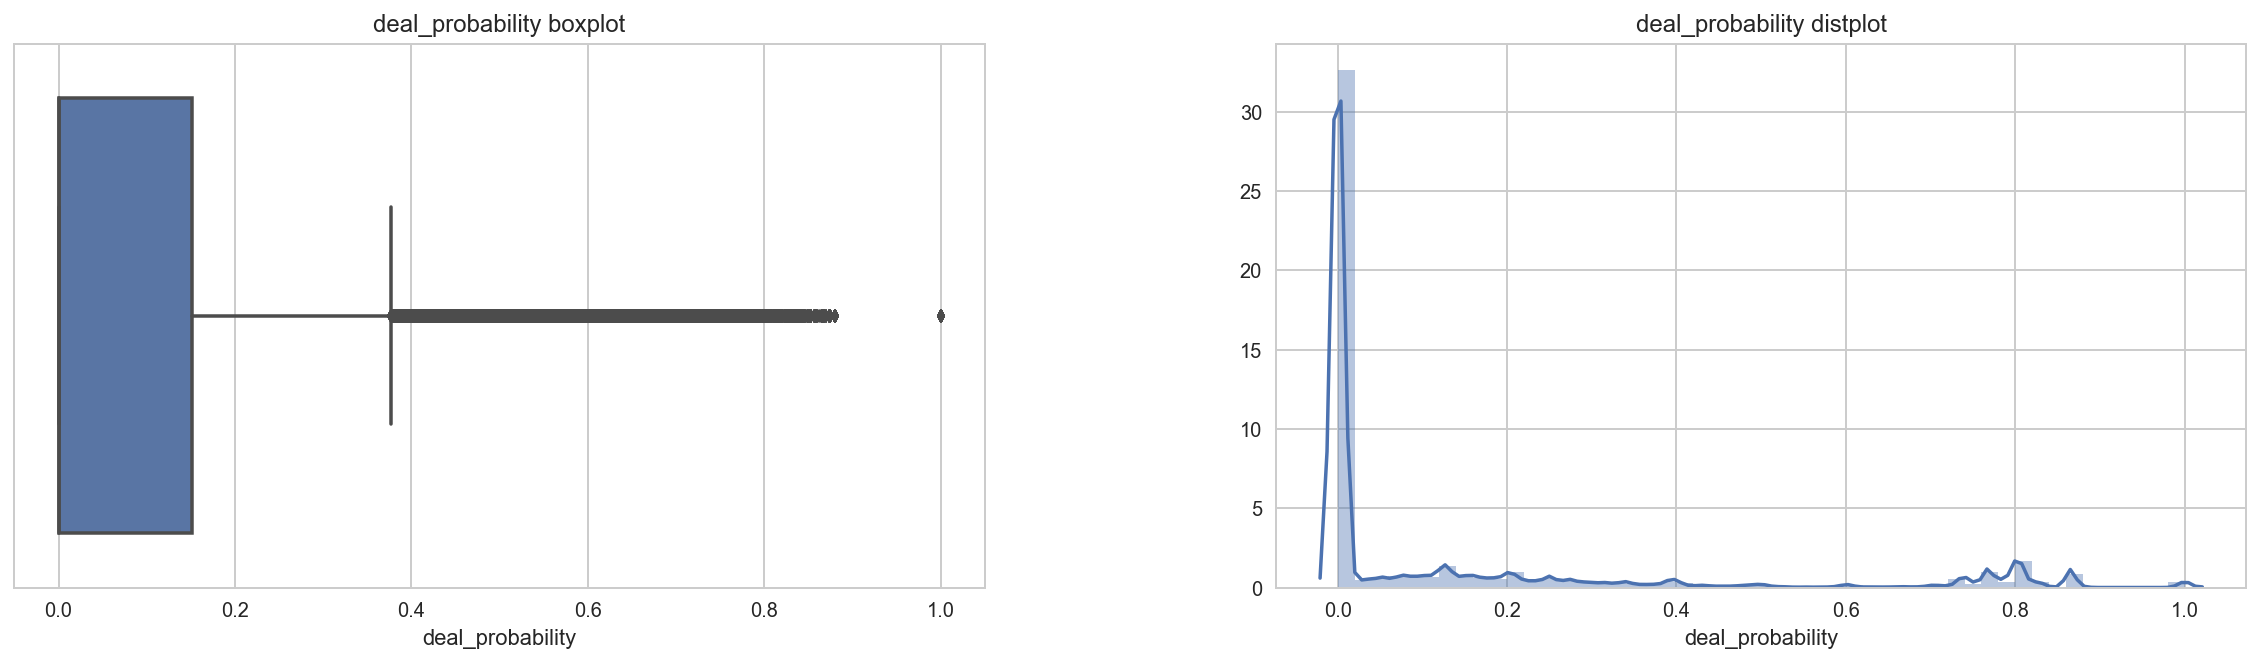

In [24]:
# deal_probability
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.3)

# boxplot
plt.subplot(121)
sns.boxplot(x = 'deal_probability', data = train)
plt.title('deal_probability boxplot')

# distplot
plt.subplot(122)
sns.distplot(train['deal_probability'].values, axlabel = 'deal_probability')
plt.title('deal_probability distplot')

plt.show()

---

### 3. Y data & X data